# 공공 Open API

* 공공 데이터 이용방법
  - https://www.data.go.kr
  - 회원가입 -> 로그인 ->  운영 계정 활용신청 -> 승인 -> 인증키 발급받음


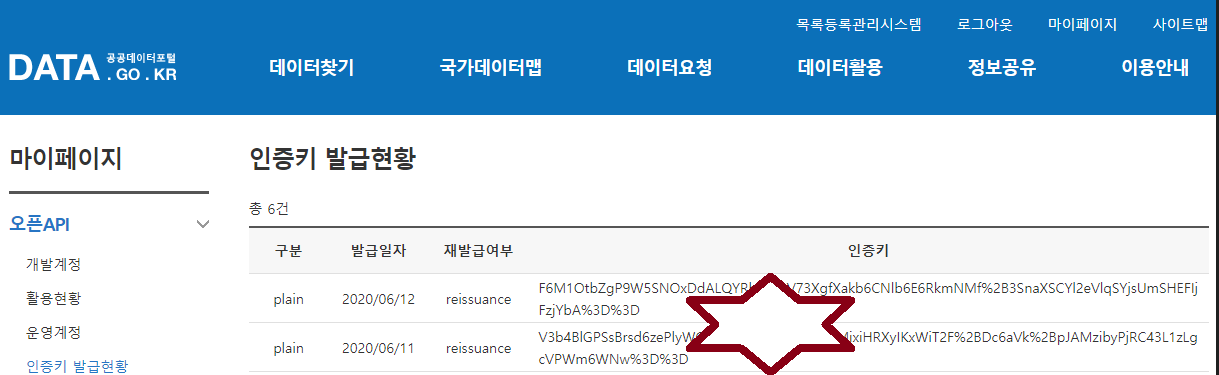

- JSON 이외에 XML 포멧으로 데이터를 다루는 경우도 많음
    - XML 관련 내용은 '다양한 데이터 읽기 - XML 파일' 참조

## 미세먼지 시도별 실시간 측정정보 조회

* 한국환경공단_대기오염정보 신청

### 대기오염 정보 활용 신청/인증키 획득

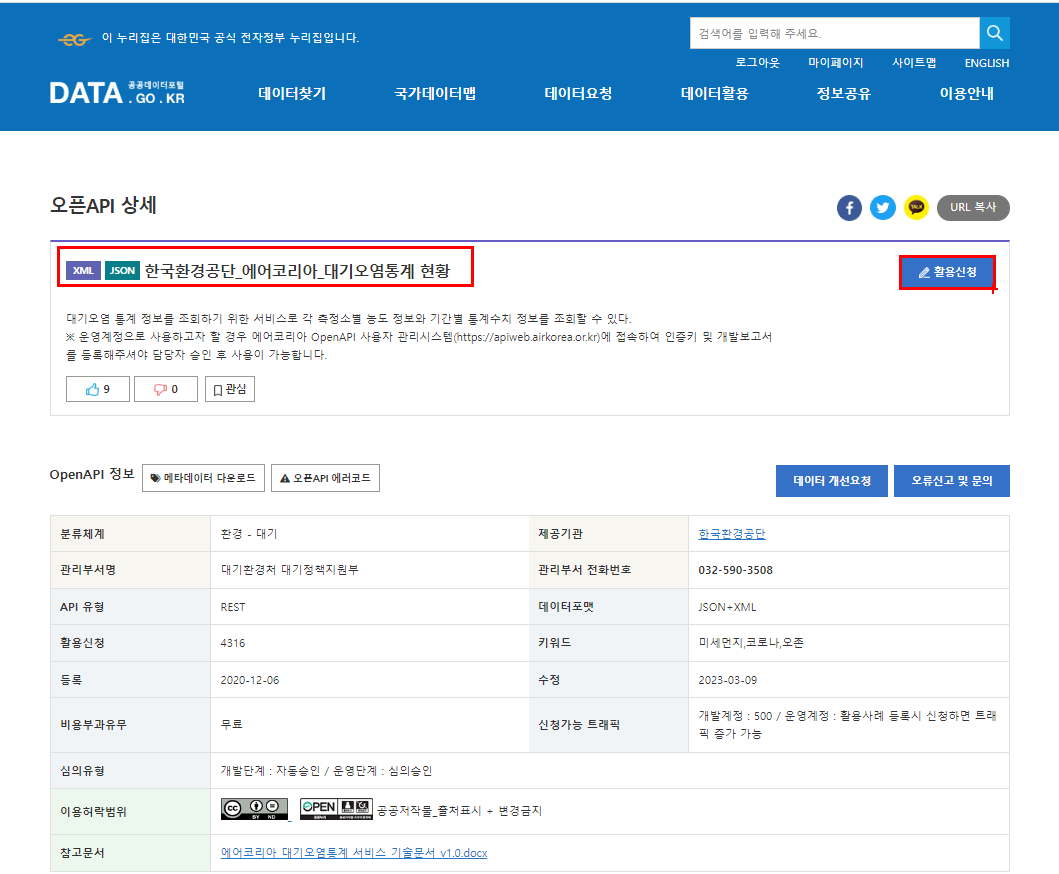

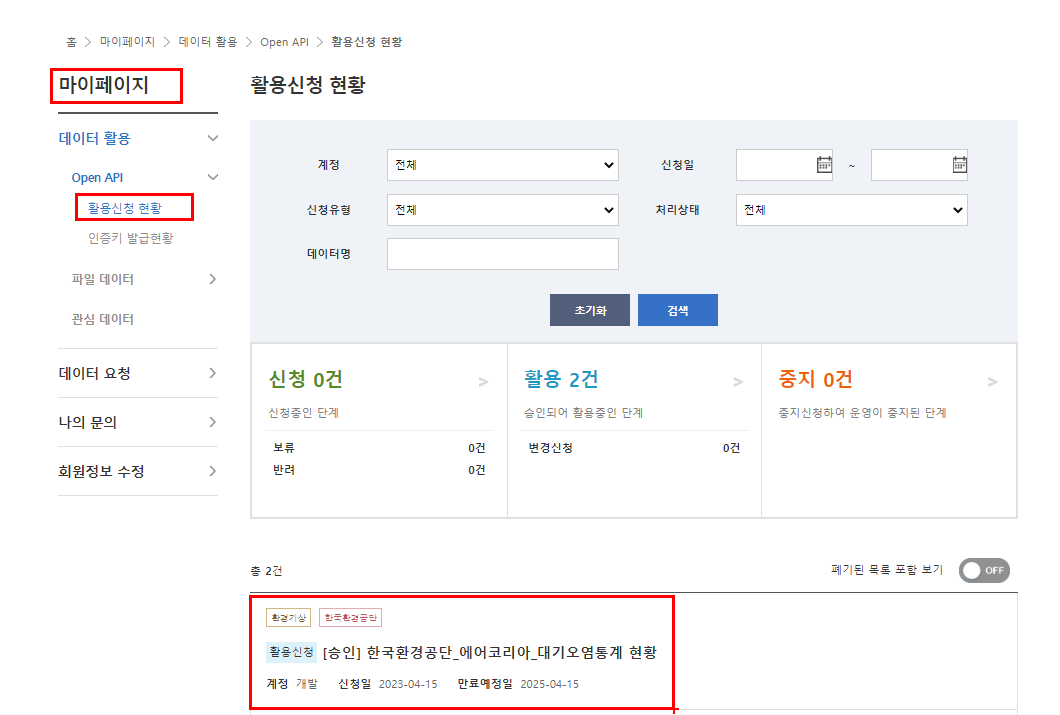

### 이용할 서비스 검토

* 요청변수가 무엇인지?
    * 내가 요청할 때 조절할 수 있는 부분이 무엇인가?
* 필수 요청 변수는 무엇인가?
    * 필수항목이 없으면 URL요청시 에러 발생

* '미리보기'를 통해 대략 받아온 데이터의 내용과 생김새를 파악한다.
    
* 참고문서 확인
    * 웹에 필수/선택항목이 정리된 것도 있지만,
    * 다시한번 해당 참고문서(에어코리아_대기오염통계 서비스_기술문서_v1.0.docx)를 확인 해보는 것을 권장한다.

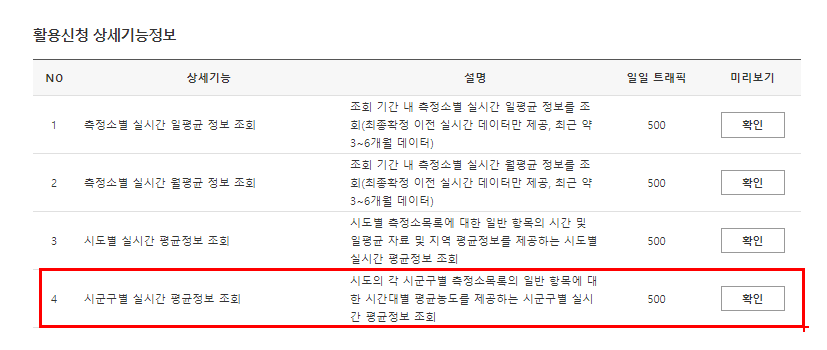

### URL 만들기

* 참고문서/ 웹페이지의 파이썬 예제를 통해서 만든다.
 
- 확인 항목
    - 나의 ServiceKey
    - 필수항목
    - open_api = URL end-point/오퍼레이션명


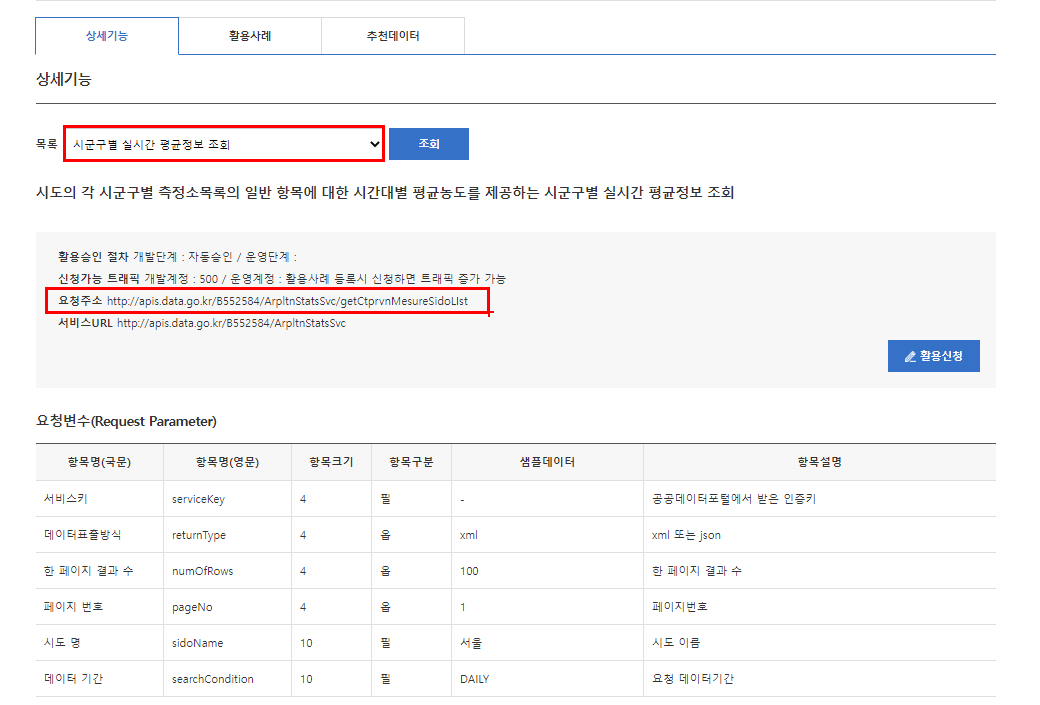

In [ ]:
import requests
from urllib import parse

# 나의 서비스키
# 서비스키 깨지지 않기위해 파싱해서 만듬 
ServiceKey = parse.unquote('인증키 입력')

# OpenAPI end-point
open_api = 'http://apis.data.go.kr/B552584/UlfptcaAlarmInqireSvc/getUlfptcaAlarmInfo'

#요청 변수
# params = {'ServiceKey':ServiceKey,'numOfRows':10,'pageNo':1,'sidoName':'서울'}
params = {'ServiceKey':ServiceKey,'numOfRows':100,'pageNo':1}

# 패턴 코드
res = requests.get(open_api, params=params)

print(res.text)

<?xml version="1.0" encoding="UTF-8"?>
<response>
  <header>
    <resultCode>11</resultCode>
    <resultMsg>NO_MANDATORY_REQUEST_PARAMETERS_ERROR</resultMsg>
  </header>
</response>


> * NO_MANDATORY_REQUEST_PARAMETERS_ERROR의 의미는?
> * 공공API 사용시 메뉴얼을 항상 확인 할 것!!

In [ ]:
import requests
from urllib import parse

# 나의 서비스키
# 서비스키 깨지지 않기위해 파싱해서 만듬 
# ServiceKey = parse.unquote('인증키%2B인증키%3D%3D')

#공공API에서 이미 디코딩된 인증키를 만들어서 줄때
ServiceKey = r'인증키 입력+인증키 입력=='

# OpenAPI end-point
open_api = 'http://apis.data.go.kr/B552584/ArpltnStatsSvc/getCtprvnMesureSidoLIst'

#요청 변수
params = {'ServiceKey':ServiceKey,'sidoName':'서울','searchCondition':'DAILY','numOfRows':100,'pageNo':1}

# 패턴 코드
res = requests.get(open_api, params=params)

# print(res.text)

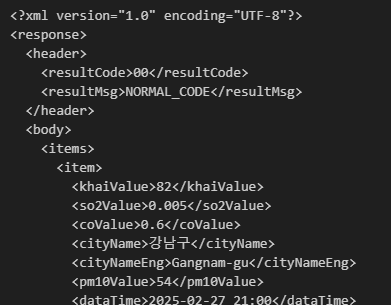

In [ ]:
# 인증키(Encoding)를 사용할 경우
# 파싱하여 전달(%특수기호 등 문제 일으킴)
parse.unquote('인증키 입력')

![스크린샷 2025-02-27 223948.png](<attachment:스크린샷 2025-02-27 223948.png>)
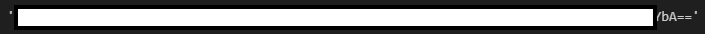

## 데이터 출력

### XML 형식 데이터 사용

* XML(Extensible Markup Language)
  - 특정 목적에 따라 데이터를 태그로 감싸서 마크업하는 범용적인 포멧
  - 마크업 언어는 태그 등을 이용하여 데이터의 구조를 기술하는 언어의 한 가지
  - 가장 친숙한 마크업 언어가 HTML
  - XML은 HTML과 마찬가지로 데이터를 계층 구조로 표현
  - XML 기본 구조
```xml
<태그 속성="속성값">내용</태그>
```

* 태그와 속성은 특정 목적에 따라 임의로 이름을 정해서 사용
```xml
<product id="M001" price="300000">32인치 LCD 모니터</product>
```


* 다른 요소와 그룹으로 묶을 수도 있음
```xml
<products type="전자제품">
  <product id="M001" price="300000">32인치 LCD 모니터</product>
  <product id="M002" price="210000">24인치 LCD 모니터</product>
</products>
```

### XML형식 데이터 출력

In [5]:
from bs4 import BeautifulSoup

soup = BeautifulSoup(res.content, 'xml')
items = soup.select('item')
for item in items:
    # print(item)    
    cityName = item.select_one('cityName').text
    pm10Value = item.select_one('pm10Value').text
    dataTime = item.select_one('dataTime').text
    print(cityName,pm10Value,dataTime)
    break

강남구 54 2025-02-27 21:00


## 종합코드:미세먼지 시도별 실시간 측정정보

In [ ]:
import requests
from urllib import parse
from bs4 import BeautifulSoup

#공공API에서 이미 디코딩된 인증키를 만들어서 줄때
ServiceKey = r'인증키 입력'

# OpenAPI end-point
open_api = 'http://apis.data.go.kr/B552584/ArpltnStatsSvc/getCtprvnMesureSidoLIst'

#요청 변수
params = {'ServiceKey':ServiceKey,'sidoName':'서울','searchCondition':'DAILY','numOfRows':100,'pageNo':1}

# 패턴 코드
res = requests.get(open_api, params=params)

# print(res.text)

soup = BeautifulSoup(res.content, 'xml')

items = soup.select('item')
# print(data)
for item in items:
    # print(item)    
    cityName = item.select_one('cityName').text
    pm10Value = item.select_one('pm10Value').text
    dataTime = item.select_one('dataTime').text
    print(cityName,pm10Value,dataTime)

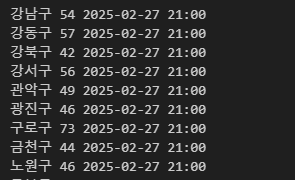

## 판다스 데이터로 변환

In [7]:
import pandas as pd

rows = []

for item in items:
    # print(item)    
    cityName = item.select_one('cityName').text
    pm10Value = item.select_one('pm10Value').text
    dataTime = item.select_one('dataTime').text
    
    rows.append({"이름":cityName,'PM10':pm10Value,'측정일시':dataTime})
    
df = pd.DataFrame(rows,columns=['이름','PM10','측정일시'])

df

,이름,PM10,측정일시
0,강남구,54,2025-02-27 21:00
1,강동구,57,2025-02-27 21:00
2,강북구,42,2025-02-27 21:00
3,강서구,56,2025-02-27 21:00
4,관악구,49,2025-02-27 21:00
...,...,...,...
95,용산구,32,2025-02-27 18:00
96,은평구,41,2025-02-27 18:00
97,종로구,38,2025-02-27 18:00
98,중구,27,2025-02-27 18:00


## 미세먼지 심한 순으로 정렬

In [8]:
df.sort_values('PM10',ascending=False)

,이름,PM10,측정일시
6,구로구,73,2025-02-27 21:00
14,서초구,67,2025-02-27 21:00
31,구로구,63,2025-02-27 20:00
56,구로구,61,2025-02-27 19:00
28,강서구,58,2025-02-27 20:00
...,...,...,...
91,성북구,33,2025-02-27 18:00
73,중구,33,2025-02-27 19:00
95,용산구,32,2025-02-27 18:00
88,서대문구,28,2025-02-27 18:00


In [12]:
import datetime

dateStr = datetime.datetime.now().strftime('%Y%m%d')
dateStr

'20250227'

In [14]:
df.to_excel(f'./data/airseoul-{dateStr}.xlsx')

## 미션1: PM10,PM25 표시되도록 하세요.

In [ ]:
import requests
from urllib import parse
from bs4 import BeautifulSoup

#공공API에서 이미 디코딩된 인증키를 만들어서 줄때
ServiceKey = r'인증키 입력'

# OpenAPI end-point
open_api = 'http://apis.data.go.kr/B552584/ArpltnStatsSvc/getCtprvnMesureSidoLIst'

#요청 변수
params = {'ServiceKey':ServiceKey,'sidoName':'서울','searchCondition':'DAILY','numOfRows':100,'pageNo':1}

# 패턴 코드
res = requests.get(open_api, params=params)

# print(res.text)

soup = BeautifulSoup(res.content, 'html.parser')

data = soup.find_all('item')

rows = []
for item in data:
    cityname = item.find('cityname').text
    pm10value = item.find('pm10value').text
    pm25value = item.find('pm25value').text
    datatime = item.find('datatime').text
    
    rows.append({"이름":cityname,'PM10':pm10value,'PM25':pm25value,'측정일시':datatime})
df = pd.DataFrame(rows,columns=['이름','PM10','PM25','측정일시'])    
    
df    


/tmp/ipykernel_1203/1478178501.py:19: XMLParsedAsHTMLWarning: It looks like you're using an HTML parser to parse an XML document.

Assuming this really is an XML document, what you're doing might work, but you should know that using an XML parser will be more reliable. To parse this document as XML, make sure you have the Python package 'lxml' installed, and pass the keyword argument `features="xml"` into the BeautifulSoup constructor.

If you want or need to use an HTML parser on this document, you can make this warning go away by filtering it. To do that, run this code before calling the BeautifulSoup constructor:

    from bs4 import XMLParsedAsHTMLWarning
    import warnings

    warnings.filterwarnings("ignore", category=XMLParsedAsHTMLWarning)

  soup = BeautifulSoup(res.content, 'html.parser')


,이름,PM10,PM25,측정일시
0,강남구,54,27,2025-02-27 21:00
1,강동구,57,35,2025-02-27 21:00
2,강북구,42,24,2025-02-27 21:00
3,강서구,56,28,2025-02-27 21:00
4,관악구,49,23,2025-02-27 21:00
...,...,...,...,...
95,용산구,32,7,2025-02-27 18:00
96,은평구,41,9,2025-02-27 18:00
97,종로구,38,17,2025-02-27 18:00
98,중구,27,15,2025-02-27 18:00


In [16]:
#가장 최근에 PM10 농도가 가장 높은 지역구는?

df.sort_values(['측정일시','PM10'],ascending=False)

,이름,PM10,PM25,측정일시
6,구로구,73,34,2025-02-27 21:00
14,서초구,67,25,2025-02-27 21:00
1,강동구,57,35,2025-02-27 21:00
3,강서구,56,28,2025-02-27 21:00
0,강남구,54,27,2025-02-27 21:00
...,...,...,...,...
94,영등포구,35,12,2025-02-27 18:00
91,성북구,33,12,2025-02-27 18:00
95,용산구,32,7,2025-02-27 18:00
88,서대문구,28,11,2025-02-27 18:00


## 미션2: 나의 지역 미세먼지 정보를 표시하세요.

In [ ]:
import requests
from urllib import parse
from bs4 import BeautifulSoup
import pandas as pd

#공공API에서 이미 디코딩된 인증키를 만들어서 줄때
ServiceKey = r'인증키'

# OpenAPI end-point
open_api = 'http://apis.data.go.kr/B552584/ArpltnStatsSvc/getCtprvnMesureSidoLIst'

#요청 변수
params = {'ServiceKey':ServiceKey,'sidoName':'경기','searchCondition':'DAILY','numOfRows':100,'pageNo':1}

# 패턴 코드
res = requests.get(open_api, params=params)

# print(res.text)

soup = BeautifulSoup(res.content, 'html.parser')

data = soup.find_all('item')
rows = []
for item in data:
    cityname = item.find('cityname').text
    pm10value = item.find('pm10value').text
    pm25value = item.find('pm25value').text
    datatime = item.find('datatime').text
    
    rows.append({"이름":cityname,'PM10':pm10value,'PM25':pm25value,'측정일시':datatime})
df = pd.DataFrame(rows,columns=['이름','PM10','PM25','측정일시'])    
    
df    


/tmp/ipykernel_1203/82603369.py:20: XMLParsedAsHTMLWarning: It looks like you're using an HTML parser to parse an XML document.

Assuming this really is an XML document, what you're doing might work, but you should know that using an XML parser will be more reliable. To parse this document as XML, make sure you have the Python package 'lxml' installed, and pass the keyword argument `features="xml"` into the BeautifulSoup constructor.

If you want or need to use an HTML parser on this document, you can make this warning go away by filtering it. To do that, run this code before calling the BeautifulSoup constructor:

    from bs4 import XMLParsedAsHTMLWarning
    import warnings

    warnings.filterwarnings("ignore", category=XMLParsedAsHTMLWarning)

  soup = BeautifulSoup(res.content, 'html.parser')


,이름,PM10,PM25,측정일시
0,가평군,,17,2025-02-27 21:00
1,고양시,54,27,2025-02-27 21:00
2,과천시,48,18,2025-02-27 21:00
3,광명시,44,15,2025-02-27 21:00
4,광주시,60,20,2025-02-27 21:00
...,...,...,...,...
95,과천시,38,8,2025-02-27 18:00
96,광명시,39,8,2025-02-27 18:00
97,광주시,46,10,2025-02-27 18:00
98,구리시,32,6,2025-02-27 18:00


In [18]:
df[df['이름']=='의왕시'].sort_values('측정일시',ascending=False)

,이름,PM10,PM25,측정일시
23,의왕시,50,20,2025-02-27 21:00
54,의왕시,43,17,2025-02-27 20:00
85,의왕시,40,12,2025-02-27 19:00
